In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Twitter_Data.csv")

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  16089 non-null  object 
 1   category    16089 non-null  float64
dtypes: float64(1), object(1)
memory usage: 251.5+ KB


In [5]:
df.shape

(16090, 2)

In [6]:
df.describe()

,category
count,16089.000000
mean,0.176083
std,0.789120
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.isna().sum()

,0
clean_text,1
category,1


In [8]:
# Drop rows with missing values in clean_text and category columns
df.dropna(subset=['clean_text', 'category'], inplace=True)

In [9]:
df.isna().sum()

,0
clean_text,0
category,0


In [10]:
# Function to clean text data
import re

def clean_text(text):
    text = text.lower()                             # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)             # Remove punctuation
    text = re.sub(r'\d+', '', text)                 # Remove numbers
    return text

In [11]:
# Apply the cleaning function
df['clean_text'] = df['clean_text'].apply(clean_text)

In [12]:
df['category'].unique()

array([-1.,  0.,  1.])

In [13]:
# Map numeric categories to sentiment labels

category_map = {-1: 'negative', 0: 'neutral', 1: 'positive'}
df['sentiment'] = df['category'].map(category_map)

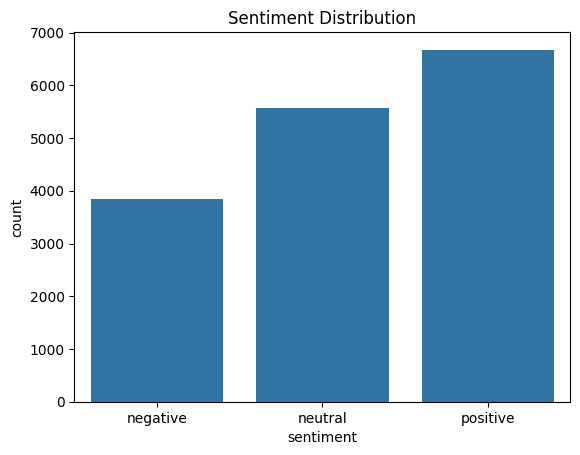

In [14]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

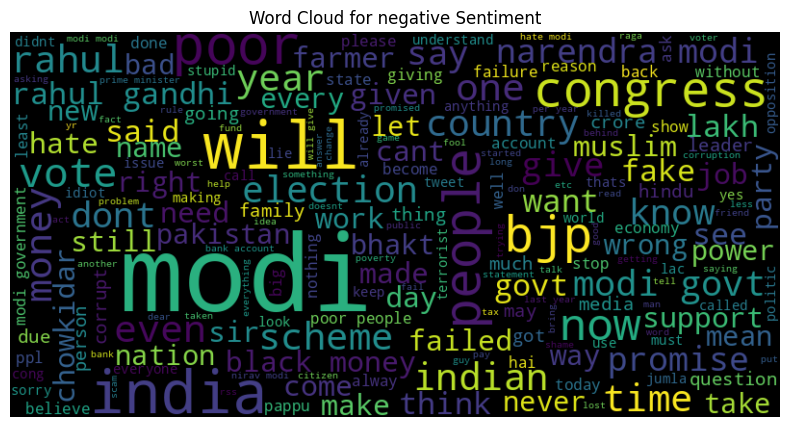

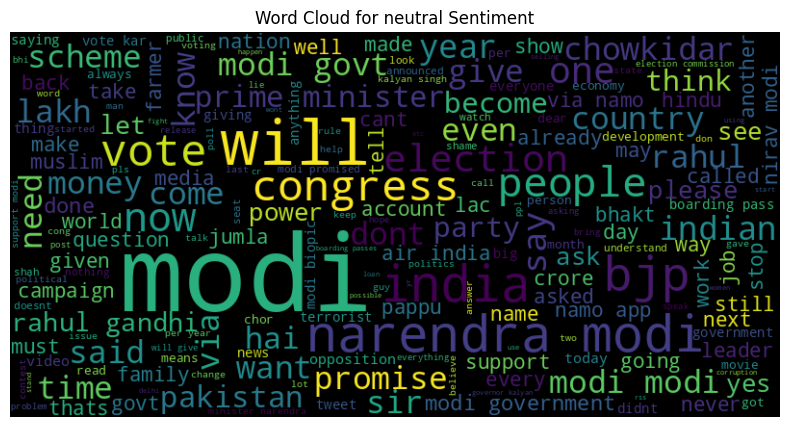

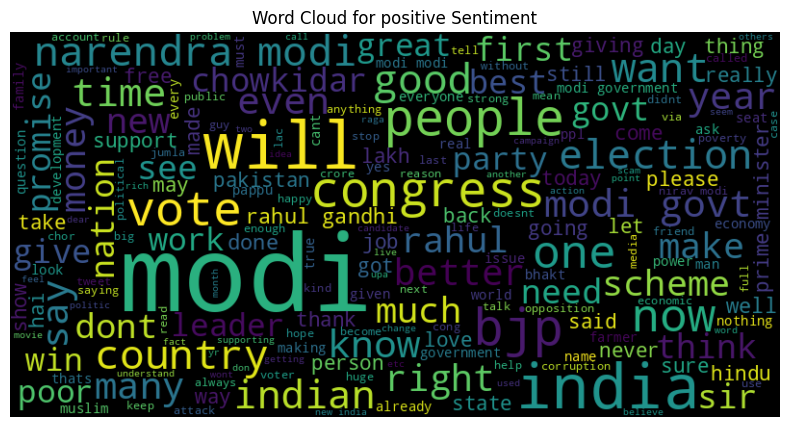

In [15]:
# Generate word clouds for each sentiment category
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Train Support Vector Machine model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

Naive Bayes Performance
Accuracy: 0.6671845866998135
              precision    recall  f1-score   support

    negative       0.88      0.32      0.46       767
     neutral       0.80      0.59      0.68      1088
    positive       0.59      0.93      0.72      1363

    accuracy                           0.67      3218
   macro avg       0.76      0.61      0.62      3218
weighted avg       0.73      0.67      0.65      3218



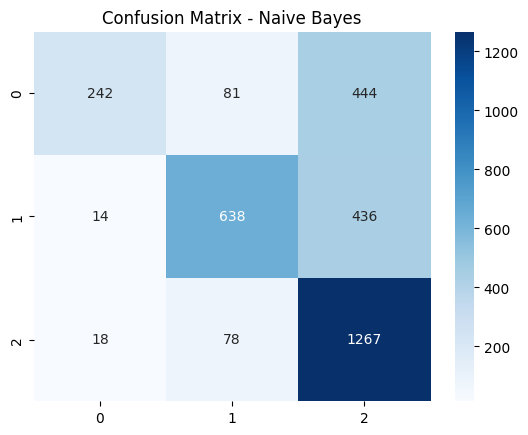

SVM Performance
Accuracy: 0.8517712865133623
              precision    recall  f1-score   support

    negative       0.84      0.72      0.77       767
     neutral       0.83      0.95      0.88      1088
    positive       0.88      0.85      0.87      1363

    accuracy                           0.85      3218
   macro avg       0.85      0.84      0.84      3218
weighted avg       0.85      0.85      0.85      3218



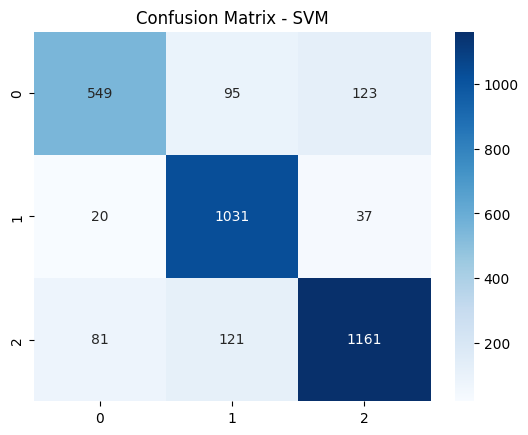

In [18]:
# Naive Bayes evaluation
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# SVM evaluation
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()